In [ ]:
from __future__ import annotations

import pandas as pd
import plotly.express as px
from pymatgen.core.periodic_table import Element


# Define periodic table data
def get_period(el):
    if el.is_actinoid or el.is_lanthanoid:
        return el.row + 3
    return el.row


def get_group(el):
    if el.is_actinoid:
        return el.group + el.Z - 89
    if el.is_lanthanoid:
        return el.group + el.Z - 57
    return el.group


def get_category(el):
    if el.Z > 92:
        return "transuranic"
    for cat in ["alkali", "alkaline", "actinoid", "lanthanoid", "halogen", "noble_gas", "metal", "chalcogen"]:
        if getattr(el, f"is_{cat}"):
            return cat
    return ""


df = pd.DataFrame(
    [
        {
            "symbol": el.symbol,
            "name": el.long_name,
            "Z": el.Z,
            "X": el.X,
            "group": get_group(el),
            "period": get_period(el),
            "category": get_category(el),
        }
        for el in Element
    ]
)

/Users/shyue/repos/pymatgen/src/pymatgen/core/periodic_table.py:294: UserWarning:

No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/Users/shyue/repos/pymatgen/src/pymatgen/core/periodic_table.py:294: UserWarning:

No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/Users/shyue/repos/pymatgen/src/pymatgen/core/periodic_table.py:294: UserWarning:

No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/Users/shyue/repos/pymatgen/src/pymatgen/core/periodic_table.py:294: UserWarning:

No Pauling electronegativity for Rf. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/Users/shyue/repos/pymatgen/src/pymatgen

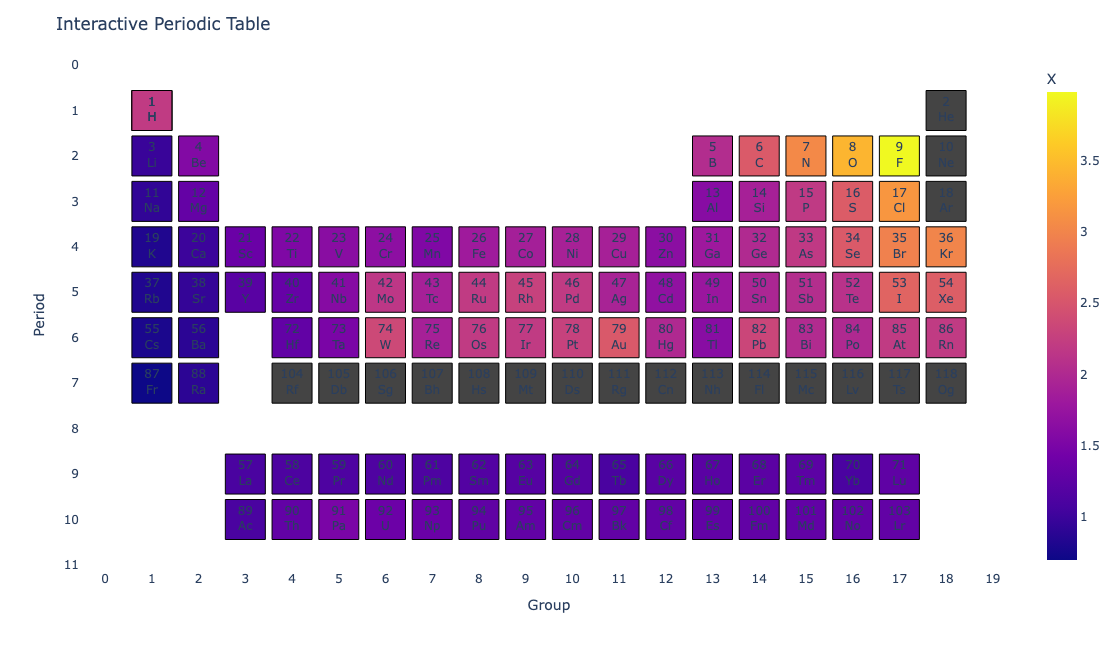

In [ ]:
# Define color mapping for categories
category_colors = {
    "metalloid": "lightblue",
    "noble_gas": "lightgreen",
    "alkali": "pink",
    "alkaline": "orange",
    "metal": "yellow",
    "chalcogen": "purple",
    "halogen": "purple",
    "actinoid": "lightgray",
    "lanthanoid": "lightcoral",
    "transuranic": "grey",
    "": "lightgrey",
}

# Create hover text for each element
df["label"] = df.apply(lambda row: f"<br>{row['Z']}<br>{row['symbol']}<br>", axis=1)

# Create the plot
fig = px.scatter(
    df,
    x="group",
    y="period",
    color="X",
    text="label",
    hover_name="X",
    hover_data={"Z": False, "name": False, "label": False, "X": False, "group": False, "period": False},
)

fig.update_traces(marker=dict(symbol="square", size=40, line=dict(color="black", width=1)))


# Update layout
fig.update_layout(
    title="Interactive Periodic Table",
    xaxis=dict(title="Group", dtick=1),
    yaxis=dict(title="Period", dtick=1, autorange="reversed"),
    showlegend=False,
    plot_bgcolor="white",
    width=1100,
    height=650,
)

# Show the plot
fig.show()

In [ ]:
print(df.to_string())